#Thresholding
In this exmaple we will perform simple image segmentation of an image using thresholding. We will load an image from the web and view it's histograms, verifying the that it is suitable for thresholding. We will then apply OTSU's thresholding and close any gaps in the binary image giving us a final "Mask" Image.

Things to try yourself in this Example:

1: Find a new image from the web(replace the image_url link in the cell below). Verify that image is an unsuitable for thresholding by looking at the greyscale histogram. Hint: complex images with lots of colour will generally be unsuitable.

2: Try and find an image from the web that could be segmented by thresholding. Hint: Any image that is close to being black and white or a dark forground object against a light background could be segmented.

In [1]:
# Import libraries
import numpy as np
import urllib.request
import numpy as np
import cv2
from matplotlib import pyplot as plt

# Function that allows test image to be read from the web
def url_to_image(url):
	user_agent = 'Mozilla/5.0 (Windows; U; Windows NT 5.1; en-US; rv:1.9.0.7) Gecko/2009021910 Firefox/3.0.7'
	headers ={'User-Agent':user_agent,}
	request=urllib.request.Request(url,None,headers)
	resp = urllib.request.urlopen(request)
	temp_image = np.asarray(bytearray(resp.read()), dtype="uint8")
	temp_image = cv2.imdecode(temp_image, cv2.IMREAD_COLOR)
	temp_image = cv2.cvtColor(temp_image, cv2.COLOR_BGR2RGB) # OpenCV defaults to BGR, but we need RGB
	return temp_image



Change URL link here to read in different images from the web

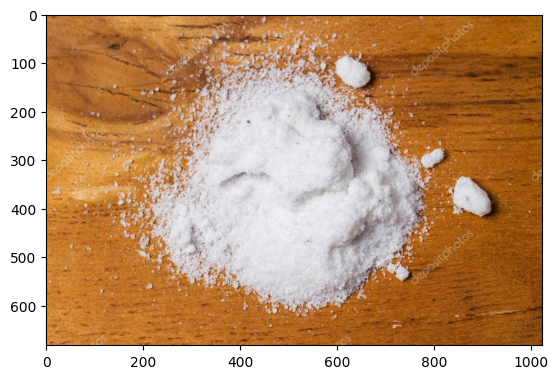

In [2]:
# read in test image
image_url = "https://st.depositphotos.com/1003591/3983/i/950/depositphotos_39832853-stock-photo-spices-heap-of-salt-on.jpg"
image = url_to_image(image_url)
plt.imshow(image)

#Gaussian Blur & Greyscale
Next we will blur the image slightly. We can set the sigma parameter number and the size of the kernel.

The blurred image must be converted to greyscale in order to find and apply the Thresholding.

In [3]:
# Add guassian blur

sigma = 5   # Order of Gaussian
# kernel size Must be approximately 6 x sigma and an odd number
k_size = int(6*sigma+1)
blur = cv2.GaussianBlur(image,(k_size,k_size),sigma)



In [4]:
# Convert to greyscale
gray = cv2.cvtColor(blur, cv2.COLOR_BGR2GRAY)


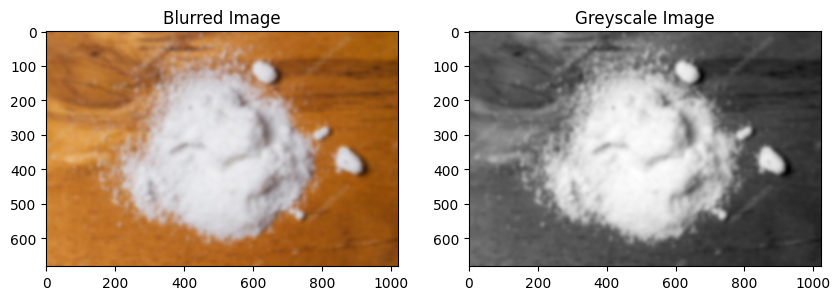

In [5]:
# Create plots
f, axarr = plt.subplots(1,2,figsize=(10,20))
axarr[0].imshow(blur,'gray')
axarr[0].title.set_text('Blurred Image')
axarr[1].imshow(gray,'gray')
axarr[1].title.set_text('Greyscale Image')


# Histograms

Before we apply thresholding we want to verify that the image is suitable for thresholding to be applied. Therefore we will inspect the greyscale histogram. The histogram for the RGB colour channels is also generated just to observe it's distribution also.

/tmp/ipython-input-1553298471.py:2: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(gray.ravel(),256,[0,256]);


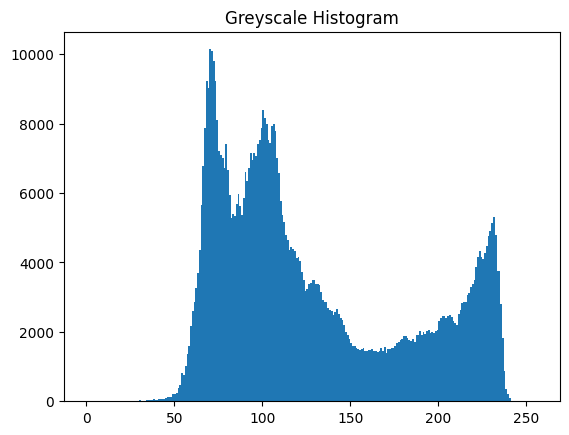

In [6]:
#plot Greyscale histogram
plt.hist(gray.ravel(),256,[0,256]);


plt.title('Greyscale Histogram')
plt.show()

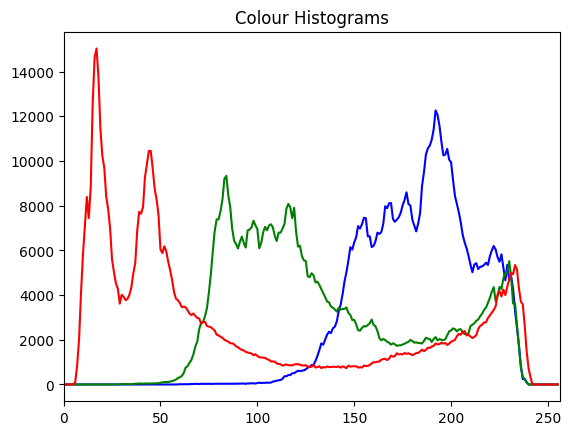

In [7]:
# Plot colour channel historgram
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([blur],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.title('Colour Histograms')
plt.show()

#Apply OTSU Threshold.
Instead of manually selecting the thresold, the OTSU method automatically selects the best threshold that minimises the spread of pixels between foreground and background.

We will also tidy up the produced mask, by adding a closing operation and then applying eroding to remove noise.

In the first cell below we can adjust the size of the structuring elements for the closing and erosion operations.

In [8]:
# Closing operation structuring element
str1 = 40
# Erosion operation stucturing element
str2 = 40

Text(0.5, 1.0, 'Thresholding')

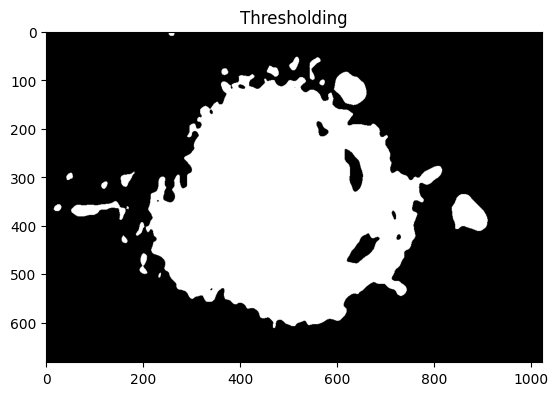

In [9]:
# Apply OTSU Threshold
ret2,otsu = cv2.threshold(gray,0,255, cv2.THRESH_OTSU)
# Use this version if image has dark foreground object on light background
#ret2,otsu = cv2.threshold(gray,0,255, cv2.THRESH_OTSU + cv2.THRESH_BINARY_INV)

plt.imshow(otsu, cmap='gray')
plt.title('Thresholding')


Text(0.5, 1.0, 'Closing Applied')

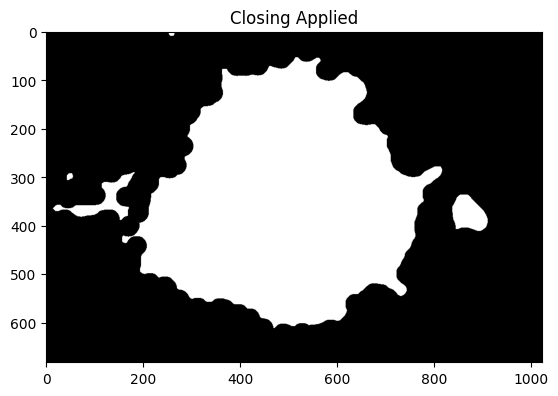

In [10]:
# Apply a closing operation
closingKernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (str1,str1))
close = cv2.morphologyEx(otsu, cv2.MORPH_CLOSE, closingKernel)
plt.imshow(close, cmap='gray')
plt.title('Closing Applied')

Text(0.5, 1.0, 'Erosion Applied')

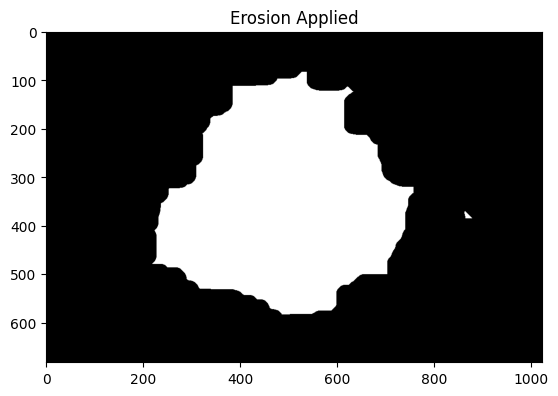

In [11]:
# Apply
eroded=cv2.erode(close,cv2.getStructuringElement(cv2.MORPH_RECT,(str2,str2)))
plt.imshow(eroded, cmap='gray')
plt.title('Erosion Applied')

# Apply Generated Mask to final Image

We now overlay the mask in the orginal image to see how well we segmented the foreground image from the backgorund.

Text(0.5, 1.0, 'Final Masked Image')

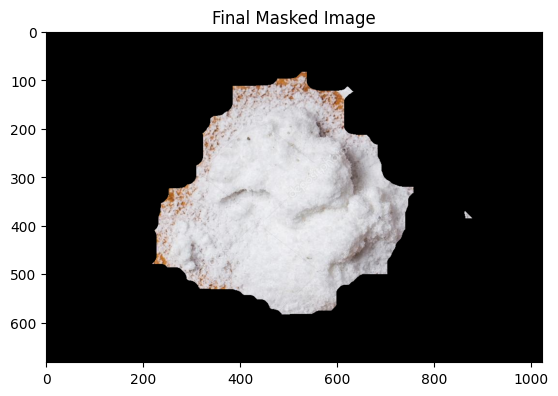

In [12]:
# Apply generated mask to final image
mask_image = img1_bg = cv2.bitwise_and(image,image,mask = eroded)
plt.imshow(mask_image)
plt.title('Final Masked Image')